In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [2]:
datapv = pd.read_csv('data_with_mpp.csv')
datapv.head()

,YEAR,MO,DY,HR,TIMESTAMP,G,T,MPP_Voltage,MPP_Power
0,2001,1,1,6,01-01-2001 06:00,39.88,19.13,22.5,5.760613
1,2001,1,1,7,01-01-2001 07:00,213.85,22.31,25.1,39.789820
2,2001,1,1,8,01-01-2001 08:00,415.99,25.26,25.7,80.342079
3,2001,1,1,9,01-01-2001 09:00,549.76,27.73,25.7,106.608227
4,2001,1,1,10,01-01-2001 10:00,561.09,29.84,25.4,107.851858


In [3]:
datapv = datapv.drop('YEAR', axis = 1)
datapv = datapv.drop('MO', axis = 1)
datapv = datapv.drop('DY', axis = 1)
datapv = datapv.drop('HR', axis = 1)
datapv = datapv.drop('TIMESTAMP', axis = 1)

datapv.head()

,G,T,MPP_Voltage,MPP_Power
0,39.88,19.13,22.5,5.760613
1,213.85,22.31,25.1,39.789820
2,415.99,25.26,25.7,80.342079
3,549.76,27.73,25.7,106.608227
4,561.09,29.84,25.4,107.851858


In [4]:
Ypv = datapv[["MPP_Voltage", "MPP_Power"]]
Xpv = datapv[["G", "T"]]
Xpv.info()
Ypv.info()

Xpv_train, Xpv_test, Ypv_train, Ypv_test = train_test_split(Xpv,Ypv,train_size = 0.75)

Xpv_train.info()
Xpv_test.info()
Ypv_train.info()
Ypv_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102587 entries, 0 to 102586
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   G       102587 non-null  float64
 1   T       102587 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102587 entries, 0 to 102586
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MPP_Voltage  102587 non-null  float64
 1   MPP_Power    102587 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
Index: 76940 entries, 98067 to 23651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       76940 non-null  float64
 1   T       76940 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 25647 entries, 50473 to 9860
Data co

In [5]:
model = keras.Sequential([
    layers.Dense(units = 100, activation = 'relu', input_shape = [2]),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 2, activation = 'linear')
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mse']
)

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 15,
    restore_best_weights = True
)

history = model.fit(
    Xpv_train, Ypv_train,
    validation_data = (Xpv_test, Ypv_test),
    batch_size = 50,
    epochs = 100,
    callbacks = [early_stopping]
)



Epoch 1/100


1539/1539 [==============================] - 5s 2ms/step - loss: 5.2329 - mse: 130.1574 - val_loss: 4.6143 - val_mse: 102.8278
Epoch 2/100
1539/1539 [==============================] - 2s 2ms/step - loss: 4.6682 - mse: 97.2638 - val_loss: 4.6450 - val_mse: 96.4320
Epoch 3/100
1539/1539 [==============================] - 3s 2ms/step - loss: 4.3118 - mse: 89.5744 - val_loss: 4.1875 - val_mse: 79.2591
Epoch 4/100
1539/1539 [==============================] - 2s 2ms/step - loss: 4.0536 - mse: 75.7303 - val_loss: 4.5117 - val_mse: 123.9876
Epoch 5/100
1539/1539 [==============================] - 2s 2ms/step - loss: 3.7392 - mse: 64.9637 - val_loss: 4.1110 - val_mse: 61.7574
Epoch 6/100
1539/1539 [==============================] - 2s 2ms/step - loss: 3.4013 - mse: 52.7195 - val_loss: 2.4881 - val_mse: 22.1978
Epoch 7/100
1539/1539 [==============================] - 3s 2ms/step - loss: 2.9089 - mse: 42.2545 - val_loss: 2.7801 - val_mse: 39.6859
Epoch 8/100
1539/1539 [===========

<Axes: >

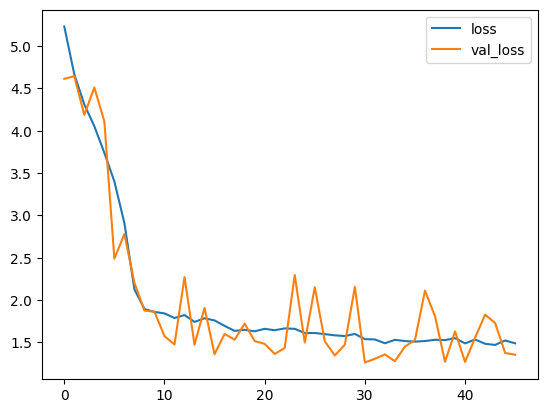

In [6]:
import matplotlib as plt
%matplotlib inline

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

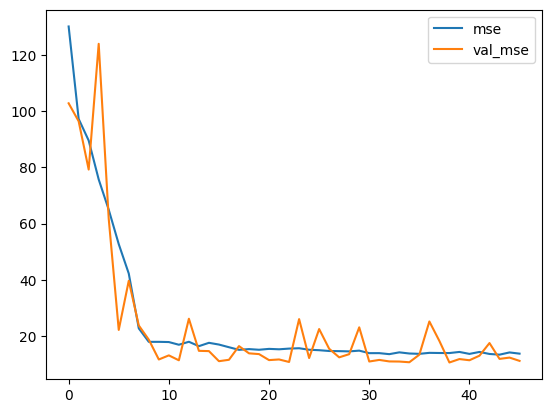

In [7]:
history_df.loc[:, ['mse', 'val_mse']].plot()

In [8]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

In [10]:
Pkl_Filename = "saved_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)
